In [3]:
import pandas as pd
for i in range(3):
    obs_df = pd.concat(
    [
        pd.read_csv(f"../data/round4/observations_round_4_day_{i+1}.csv", sep=',')
        .assign(timestamp=lambda df: (i * 1_000_000 + df['timestamp']))
        for i in range(3)
    ],
    ignore_index=True
)

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/e1/0c/ad295fd74bfac85358fd579e271cded3ac969de81f62dd0142c426b9da91/pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.7 MB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/81/c4/34e93fe5f5429d7570ec1fa436f1986fb1f00c3e0f43a589fe2bbcd22c3f/pytz-2025.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/5c/23/c7abc0ca0a1526a0774eca151daeb8de62ec457e77262b66b359c3c7679e/tzdata-2025.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 14.5 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip

R^2: 0.31551297275120194
Intercept: [612.2176049]
Coefficients: [[ 1.26720376 -3.70958229]]


/var/folders/4f/ty7xwcfx54s72p4gbm6q93n80000gn/T/ipykernel_62405/363298683.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  obs_df['sunlightSlope'].iloc[0] = obs_df['sunlightSlope'].iloc[1]
/var/folders/4f/ty7xwcfx54s72p4gbm6q93n80000gn/T

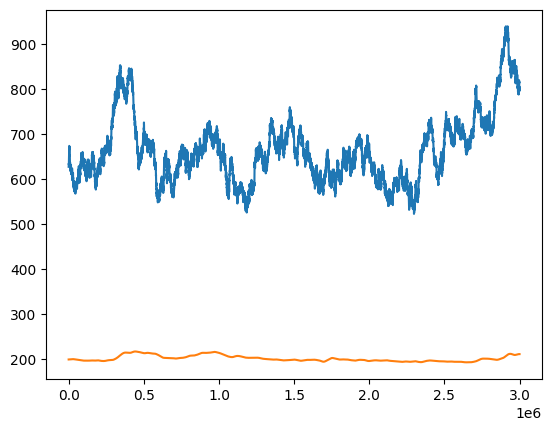

In [52]:
# exp. moving average 
#obs_df['sugarPrice'] = obs_df['sugarPrice'].ewm(span=100).mean()
import matplotlib.pyplot as plt
#obs_df['midPrice'] = obs_df['midPrice'].ewm(span=100).mean()
obs_df['midPrice'] = (obs_df['bidPrice'] + obs_df['askPrice'])/2
obs_df['sunlightSlope'] = obs_df['sunlightIndex'].diff()
obs_df['sunlightSlope'].iloc[0] = obs_df['sunlightSlope'].iloc[1]
# obs_df['sunlightSlope']

plt.plot(obs_df['timestamp'], obs_df['midPrice'])
plt.plot(obs_df['timestamp'], obs_df['sugarPrice'])
# calculate r^2 coefficient between the two

# x = obs_df['sugarPrice','sunlightIndex']
x = obs_df[['sugarPrice', 'sunlightIndex']].values
y = obs_df['midPrice'].values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x,y)
# print coeffs
#print (f"R^2: {model.score(x,y)}")
print (f"R^2: {model.score(x,y)}")
print (f"Intercept: {model.intercept_}")
print (f"Coefficients: {model.coef_}")